# PyTorch. Основы: синтаксис, torch.cuda и torch.autograd

## Задание 7.1

In [76]:
import torch as t
import matplotlib.pyplot as plt
from torch.autograd import Variable

### Задача 1

1). Создайте два вещественных тензора: `a` размером (3, 4) и `b` размером (12,)   
2). Создайте тензор `c`, являющийся тензором `b`, но размера (2, 2, 3)  
3). Выведите первый столбец матрицы `a` с помощью индексации

In [21]:
a = t.FloatTensor(3, 4)
b = t.FloatTensor(12,)
c = b.view(2, 2, 3)
a[:,0]

tensor([0., 0., 0.])

### Задача 2

1). Создайте два вещественных тензора: `a` размером (5, 2) и `b` размером (1,10)   
2). Создайте тензор `c`, являющийся тензором `b`, но размера (5, 2)  
3). Произведите все арифметические операции с тензорами `a` и `c`

In [23]:
a = t.FloatTensor(5, 2).random_()
b = t.FloatTensor(1, 10).random_()
c = b.view(5, 2)
a, c

(tensor([[13715556.,  2519856.],
         [13979441.,  3155882.],
         [14866445.,  3322728.],
         [13910854.,  3083152.],
         [ 6806823.,  1437468.]]),
 tensor([[ 1324986.,  3818078.],
         [ 8717887.,  3232167.],
         [11633929., 10692430.],
         [ 4213764.,   959866.],
         [ 5517986.,  1836435.]]))

In [24]:
a.add(c)

tensor([[15040542.,  6337934.],
        [22697328.,  6388049.],
        [26500374., 14015158.],
        [18124618.,  4043018.],
        [12324809.,  3273903.]])

In [25]:
a.sub(c)

tensor([[12390570., -1298222.],
        [ 5261554.,   -76285.],
        [ 3232516., -7369702.],
        [ 9697090.,  2123286.],
        [ 1288837.,  -398967.]])

In [26]:
a.div(c)

tensor([[10.3515,  0.6600],
        [ 1.6035,  0.9764],
        [ 1.2779,  0.3108],
        [ 3.3013,  3.2121],
        [ 1.2336,  0.7827]])

In [27]:
a.mul(c)

tensor([[1.8173e+13, 9.6210e+12],
        [1.2187e+14, 1.0200e+13],
        [1.7296e+14, 3.5528e+13],
        [5.8617e+13, 2.9594e+12],
        [3.7560e+13, 2.6398e+12]])

### Задача 3

1). Создайте тензор *целых чисел* `images` размерности (100, 200, 200, 3) (можно интерпретировать это как 100 картинок размера 200х200 с тремя цветовыми каналами, то есть 100 цветных изображений 200х200). Заполните его нулями  

2). Сделайте так, чтобы у $i$-ой по порядку картинки была нарисована белая полоса толщиной два пикселя в строках, которые соответствуют номеру картинки. Например, у 3-ей по порядку картинки белая полоска будет занимать 6 и 7 строки, у 99 - 198 и 199. Сделать белую строку можно, записав в ячейки тензора число 255 (по всем трём каналам). Выведите несколько примеров с помощью `pylot`  

3). Посчитайте среднее тензора `images` по 1-ой оси (по сути - средняя картинка), умножьте полученный тензор на 70. Нарисуйте с помощью `pyplot`, должна получиться серая картинка (при взятии среднего нужно привести тензор к float с помощью `.float()`, при отрисовке обратно к int с помощью `.int()`)

In [132]:
a = t.FloatTensor(100, 200, 200, 3).zero_()
for i, img in enumerate(a):
    img.index_fill_(0, t.tensor([2 * i, 2 * i + 1]), 255)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


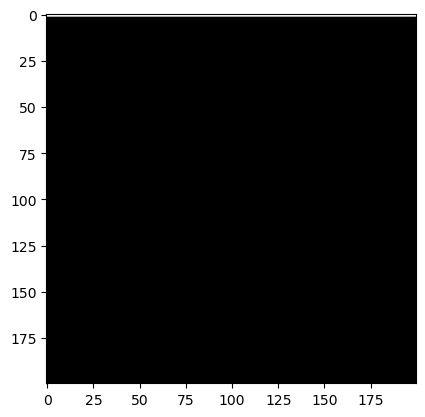

In [133]:
plt.imshow(a[0])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


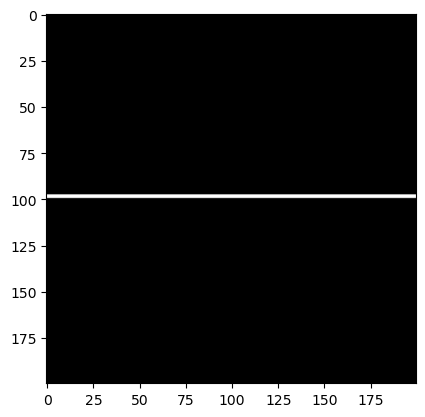

In [134]:
plt.imshow(a[49])

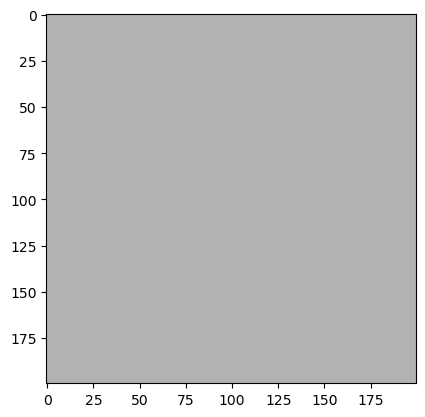

In [135]:
plt.imshow((a.float().mean(0) * 70).int())

### Задача 4

- В Colab нажмите в меню сверху: `Runtime` -> `Change Runtime Type` -> `GPU`, где изначально стоит `None` (`Среда выполнение` - `Сменить среду выполнения`)
- Объявите тензор `a` размера (2, 3, 4) и тензор `b` размера (1, 8, 3) на GPU, иницилизируйте их случайно равномерно (`.uniform_()`)
- Затем измените форму тензора `b`, чтобы она совпадала с формой тензора `a`, получите тензор `c`  
- Переместите `c` на CPU, переместите `a` на CPU  
- Оберните их в `Variable()`
- Объявите тензор `L = torch.mean((c - a) `**` 2)` и посчитайте градиент `L` по `c` ( то есть $\frac{\partial{L}}{\partial{c}})$
- Выведите градиент `L` по `c`

In [115]:
a = t.cuda.FloatTensor(2, 3, 4).uniform_()
b = t.cuda.FloatTensor(1, 8, 3).uniform_()
c = b.view_as(a)

In [116]:
a_v = Variable(a)
c_v = Variable(c, requires_grad=True)
L = t.mean((c_v - a_v)**2)

In [117]:
L.backward()

In [118]:
c_v.grad

tensor([[[ 0.0226, -0.0267, -0.0554,  0.0093],
         [-0.0128, -0.0507, -0.0209, -0.0131],
         [ 0.0505,  0.0206, -0.0003, -0.0082]],

        [[ 0.0473, -0.0175,  0.0027,  0.0216],
         [ 0.0429, -0.0600,  0.0547,  0.0471],
         [-0.0119,  0.0410, -0.0101, -0.0292]]], device='cuda:0')